In [83]:
import numpy as np
import pandas as pd
from scipy import stats

mean = 160
std = 5
n = 100
c = 164

h_data_origin = pd.Series((np.random.randn(n) * std ) + mean)
print("原始数据的均值和标准差为: %.2f, %.2f" % (h_data_origin.mean(), h_data_origin.std()))
      
h_data_trunc = h_data_origin[h_data_origin <= c]
print("截断后数据的均值和标准差为: %.2f, %.2f" % (h_data_trunc.mean(), h_data_trunc.std()))

原始数据的均值和标准差为: 160.30, 5.02
截断后数据的均值和标准差为: 158.50, 4.00


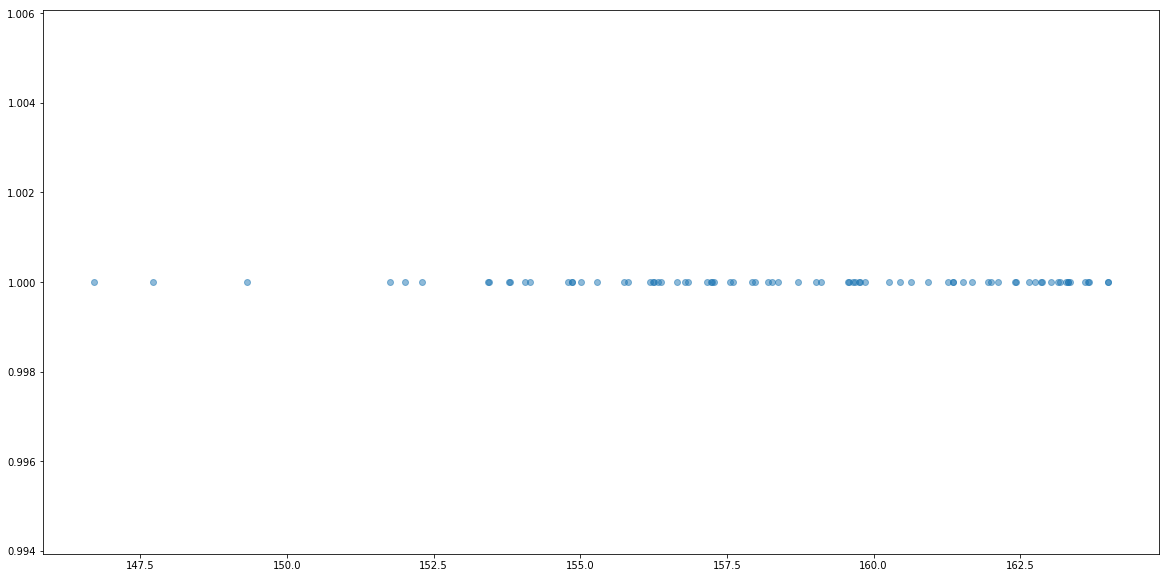

In [84]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(h_data_trunc, [1,] * len(h_data_trunc), alpha=0.5)
plt.show()

In [82]:
def guess_mean(mean_guessed):
    c_mirror = 2 * mean_guessed - c
    h_tofill = 2 * mean_guessed - h_data[h_data < c_mirror]
    h_new = pd.concat([h_data, h_tofill])
    est_mean = h_new.mean()
    est_std = h_new.std()
    error = abs(mean_guessed - est_mean)
    return est_mean, est_std, error

s = pd.Series()
for mean_guessed in np.arange(155, c - 1 + 0.01, 0.1):
    est_mean, est_std, error = guess_mean(mean_guessed)
    s[mean_guessed] = error
s.sort_values(inplace=True)
est_mean, est_std, _ = guess_mean(s.index[0])
print("拟合后数据的均值和标准差为: %.2f, %.2f" % (est_mean, est_std))

拟合后数据的均值和标准差为: 162.70, 6.06
